In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

%load_ext autoreload
%autoreload 2

from tqdm.notebook import tqdm as tqdm_notebook
import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
# import importlib
from IPython.display import display, HTML
import pandas as pd
import pickle

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb
# %matplotlib notebook

from sympy.parsing import mathematica
import sympy
from sympy.printing.latex import LatexPrinter, print_latex
from sympy.utilities.lambdify import lambdify, lambdastr
import inspect

%matplotlib inline
rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

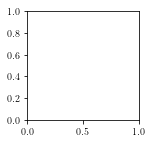

In [2]:
fig = plt.figure(figsize=(2, 2))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)

In [25]:
# archive 

# # active ecoli in shear flow, base flow theory, petsc family method 
# # importlib.reload(spf_tb)
# # t_theta, t_phi, t_psi = np.pi / 2, np.pi / 2, 0
# # t_theta, t_phi, t_psi = 0.5, 1, 0
# # t_theta, t_phi, t_psi = 0.3 * np.pi, 1.3 * np.pi, 0
# # t_theta, t_phi, t_psi = np.random.sample(1)[0] * np.pi, np.random.sample(1)[0] * 2 * np.pi, np.random.sample(1)[0] * 2 * np.pi
# # t_theta, t_phi, t_psi = 0.692, 0.339, 3.989
# # t_theta, t_phi, t_psi = 2.382, 4.571, 4.344
# t_theta, t_phi, t_psi = 1.515, 4.472, 1.003, 
# # t_theta, t_phi, t_psi = 0, 0, 0
# max_t = 100
# update_fun = '5bs'
# rtol = 1e-6
# atol = 1e-9
# eval_dt = 0.01
# save_every = 1
# # table_name = 'ecoC01B05_4tail_baseFlow'
# # table_name_mdf = 'ecoC01B05_4tail_baseFlow_mdf'
# table_name = 'ecoB05_baseFlow4'
# # table_name = 'ecoB01_baseFlow'
# # table_name = 'ecoC01B05_baseFlow'
# # table_name_mdf = 'ecoB01_baseFlow_mdf'
# # table_name = 'hlxC02B05_baseFlow'
# # table_name_mdf = 'hlxC02B05_baseFlow_mdf'
# # table_name = 'hlxC03B05_baseFlow'
# # table_name_mdf = 'hlxC03B05_baseFlow_mdf'
# # table_name = 'hlx2_rh11_10.000_ph_20.00_baseFlow'
# # table_name_mdf = 'hlx2_rh11_10.000_ph_20.00_baseFlow_mdf'
# # table_name = 'hlx2_rh11_1.000_ph_6.67_baseFlow'
# # table_name_mdf = 'hlx2_rh11_1.000_ph_6.67_baseFlow_mdf'
# # table_name = 'hlxB01_baseFlow2'
# # table_name_mdf = 'hlxB01_baseFlow2_mdf'
# omega_tail = 1
# flow_strength = 1

# # t0 = time()
# # tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
# # Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
# #    = spf_tb.do_ShearFlowPetsc4nPsiObj(tnorm, t_psi, max_t, update_fun=update_fun, 
# #                                       rtol=rtol, atol=atol, eval_dt=eval_dt, 
# #                                       save_every=save_every, table_name=table_name, 
# #                                       omega_tail=omega_tail, flow_strength=flow_strength)
# # t1 = time()
# # print('init \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (t_theta, t_phi, t_psi))
# # print('last \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (Table_theta[-1], Table_phi[-1], Table_psi[-1]))
# # print('%s: run %d loops/times using %fs' % ('do_ShearFlowPetsc4nPsiObj_dbg', max_t, (t1 - t0)))
# # print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
# # # tidx = Table_t > (Table_t.max() - Table_t.min()) * 0.9 + Table_t.min() 
# # tidx = Table_t > 0 
# # # spf_tb.show_table_result_v2(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
# # #                          Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], save_every=save_every)
# # fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# # spf_tb.light_show_theta_phi(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
# #                             Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], fig=fig)

# t0 = time()
# tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
# Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
#    = spf_tb.do_ShearFlowPetsc4nPsiObj_dbg(tnorm, t_psi, max_t, update_fun=update_fun, 
#                                           rtol=rtol, atol=atol, eval_dt=eval_dt, 
#                                           save_every=save_every, table_name=table_name, 
#                                           omega_tail=omega_tail, flow_strength=flow_strength)
# t1 = time()
# print('init \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (t_theta, t_phi, t_psi))
# print('last \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (Table_theta[-1], Table_phi[-1], Table_psi[-1]))
# print('%s: run %d loops/times using %fs' % ('do_ShearFlowPetsc4nPsiObj_dbg', max_t, (t1 - t0)))
# print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
# # tidx = Table_t > (Table_t.max() - Table_t.min()) * 0.9 + Table_t.min() 
# tidx = Table_t > 0 
# # spf_tb.show_table_result_v2(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
# #                          Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], save_every=save_every)
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# spf_tb.light_show_theta_phi(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
#                             Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], fig=fig)


init \theta=0.000, \phi=0.000, \psi0.000, 
last \theta=1.667, \phi=0.738, \psi0.803, 
do_calculate_ecoli_Petsc4n: run 10 loops/times using 5.715091s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-03 5.7s


True

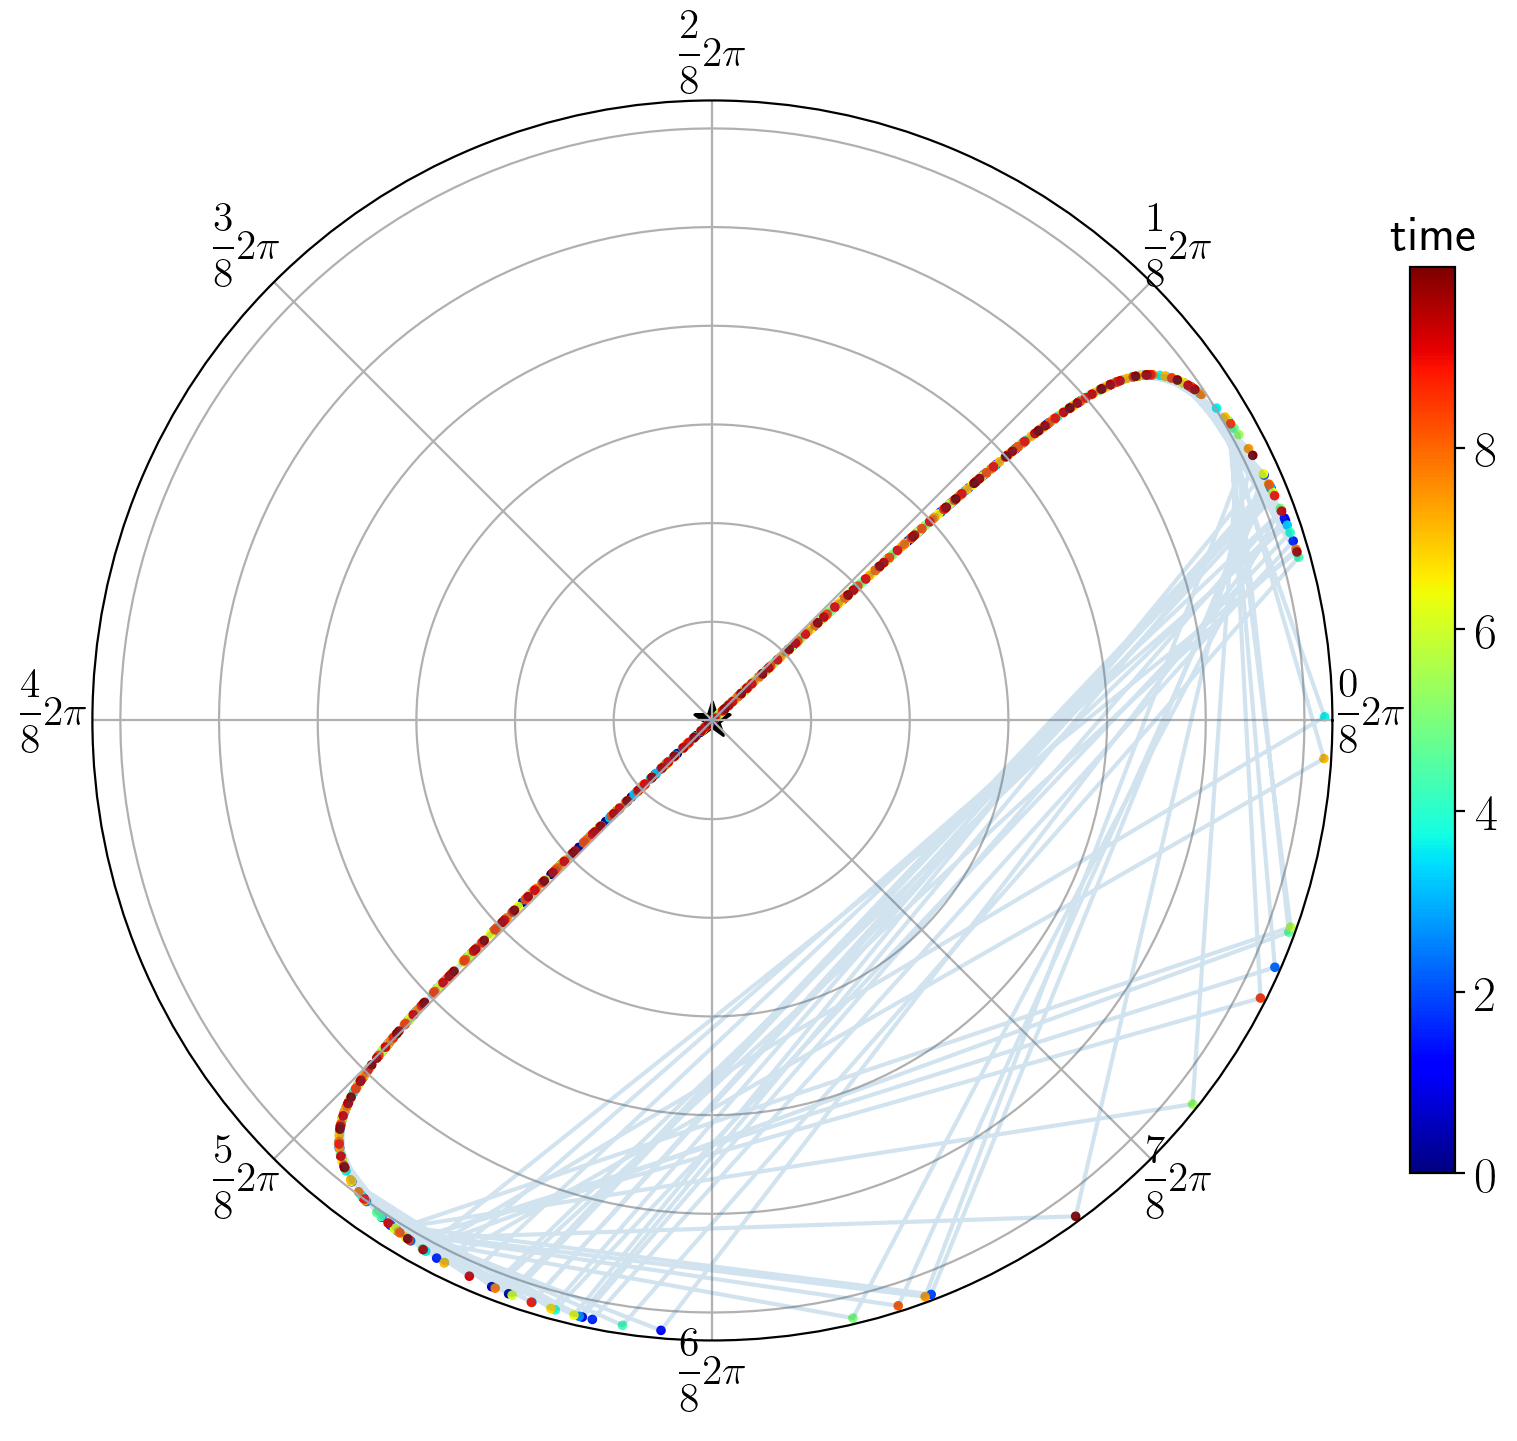

In [20]:
# ecoli base flow method 
t0 = time()
# t_theta, t_phi, t_psi = np.pi / 2, np.pi / 2, 0
# t_theta, t_phi, t_psi = 1.366, 6.283, 0
# t_theta, t_phi, t_psi = 0, 0.6 * np.pi, 0
t_theta, t_phi, t_psi = 0, 0, 0
# t_theta, t_phi, t_psi = 1.529, 3.509, 3.815
# t_theta, t_phi, t_psi = 1.964943, 1.046438, 2.730529326794896
# t_theta, t_phi, t_psi = np.pi / 2, np.pi * 3 / 2, 0 
# t_theta, t_phi, t_psi = np.random.sample(1)[0] * np.pi, np.random.sample(1)[0] * 2 * np.pi, np.random.sample(1)[0] * 2 * np.pi
max_t = 10
update_fun='5bs'
rtol = 1e-9
atol = 1e-12
eval_dt = 0.001
save_every = 1
# table_name2 = 'ecoC01B05_baseFlow'
# table_name2 = 'ecoB01B05_baseFlow'
# table_name2 = 'ecoB03B05_baseFlow'
# table_name2 = 'ecoC01B05_left_baseFlow'
# table_name2 = 'ecoB01B05_left_baseFlow'
# table_name2 = 'ecoB03B05_left_baseFlow'
# table_name2 = 'ellipsoidB05_act_baseFlow'
table_name2 = 'ecoC01B05_baseFlow_laterRot'
omega_tail = 1
flow_strength = 0

# base flow method 
t0 = time()
tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_ShearFlowPetsc4nPsiObj(tnorm, t_psi, max_t, update_fun=update_fun, 
                                      rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                      save_every=save_every, table_name=table_name2, 
                                      omega_tail=omega_tail, flow_strength=flow_strength)
t1 = time()
print('init \\theta=%.3f, \\phi=%.3f, \\psi%.3f, ' % (t_theta, t_phi, t_psi))
print('last \\theta=%.3f, \\phi=%.3f, \\psi%.3f, ' % (Table_theta[-1], Table_phi[-1], Table_psi[-1]))
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc4n', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
# spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
#                          Table_theta, Table_phi, Table_psi, Table_eta, save_every=save_every)
# spf_tb.show_theta_phi_psi_eta(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
#                               Table_theta, Table_phi, Table_psi, Table_eta)
spf_tb.light_show_theta_phi(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                            Table_theta, Table_phi, Table_psi, Table_eta)

<IPython.core.display.Javascript object>


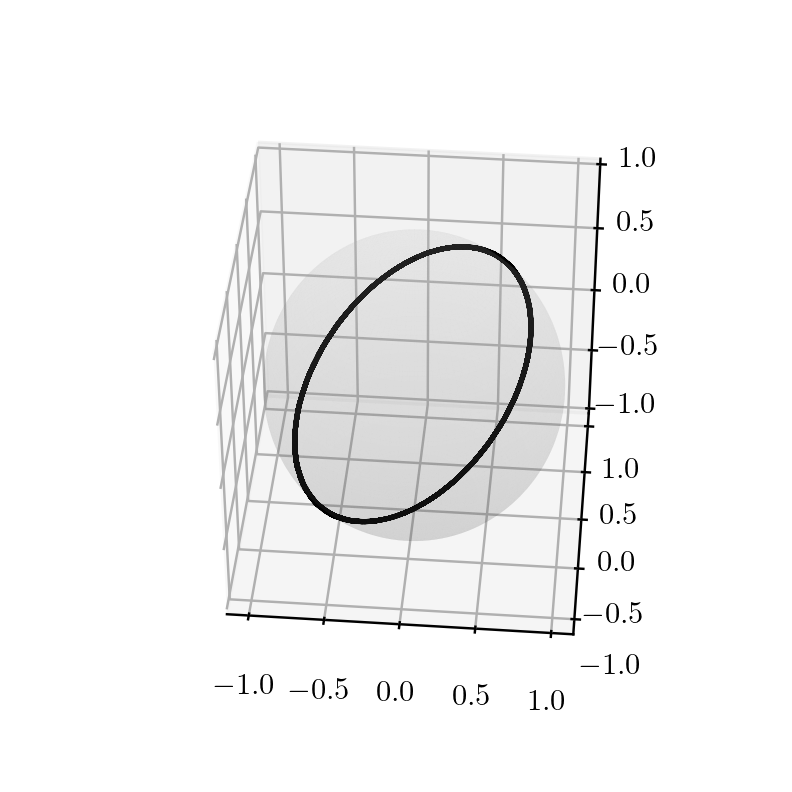

In [23]:
%matplotlib notebook
from matplotlib import colors as mcolors

figsize=np.array((9, 9))*0.4
dpi = 500 if 'inline' in matplotlib.get_backend() else 200
tr = 1

fig, axorin = plt.subplots(1, 1, figsize=figsize, dpi=dpi, subplot_kw=dict(projection='3d'))
fig.patch.set_facecolor('white')
# Jeffery sphere
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
x = np.cos(u) * np.sin(v) * tr
y = np.sin(u) * np.sin(v) * tr
z = np.cos(v) * tr
color1 = plt.get_cmap('gray')(np.linspace(0.2, 0.8, 256))
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', color1)
axorin.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cmap, edgecolor='none', alpha=0.1)
axorin.plot(Table_P[:, 0] * tr, Table_P[:, 1] * tr, Table_P[:, 2] * tr, 'k')



last norm:  1.5434681134807624 , 3.15660047587439 , 2.7461955492565067
do_calculate_ecoli_Petsc4nPsi: run 1 loops/times using 0.279866s
PETSC RK_5bs rt1e-12, at1e-15, dt1e-02 0.3s


True

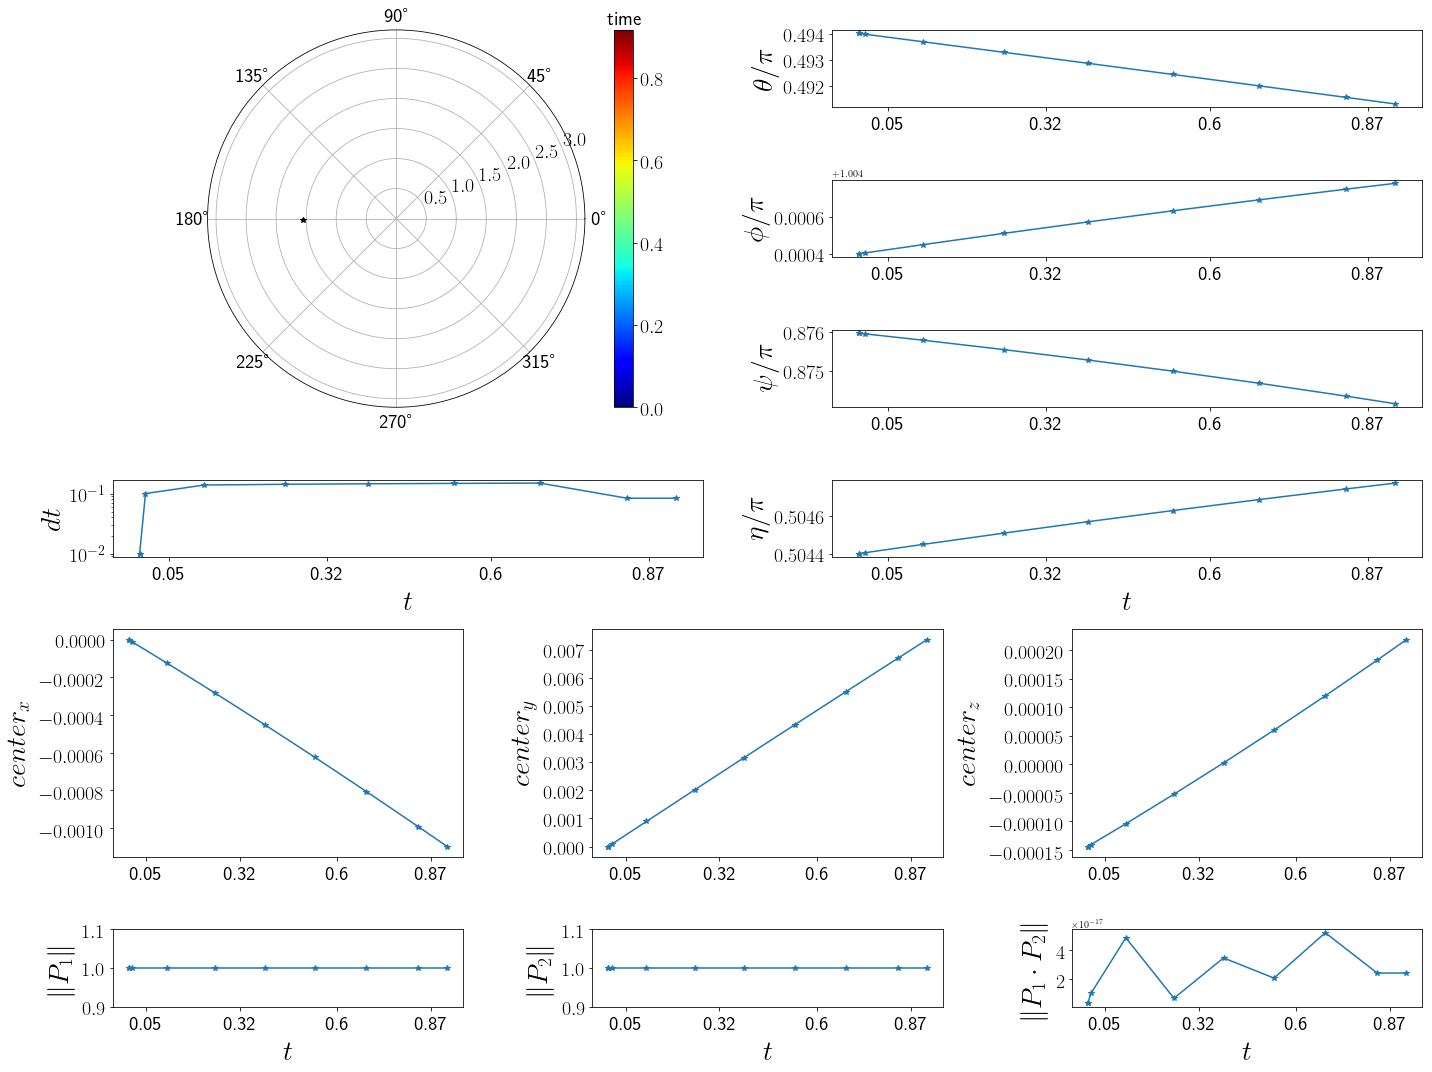

In [7]:
# passive ecoli petsc family method 
# importlib.reload(spf_tb)
# importlib.reload(jm)

t0 = time()
# t_theta, t_phi, t_psi = np.pi / 2, np.pi / 2, 0
t_theta, t_phi, t_psi = 0, 0, 0
max_t = 1
update_fun='5bs'
rtol=1e-12
atol=1e-15
eval_dt = 0.01
save_every = 1

t_theta, t_phi, t_psi = 1.5519607818186965 , 3.1554179700918383 , 1.1811466563914905
table_name='ecoC01B05_tau1c_passive'
omega_tail=0

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
t_psi = np.ones(1) * t_psi
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta\
   = spf_tb.do_calculate_ecoli_passive_Petsc4n(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, 
                                          eval_dt=eval_dt, save_every=save_every, 
                                          table_name=table_name, omega_tail=omega_tail)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc4nPsi', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every=save_every)

# t_pick = (t_theta, t_phi, t_psi, max_t, update_fun, rtol, atol, eval_dt, 
#           Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, save_every=save_every)
# idx = np.load('../motion_ecoliB01_t able/idx.npy')
# t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
# np.save('../motion_ecoliB01_table/idx.npy', (idx + 1))
# with open('../motion_ecoliB01_table/%s' % t_name, 'wb') as handle:    
#     pickle.dump(t_pick, handle, protocol=pickle.HIGHEST_PROTOCOL)
# print('save to %s' % t_name)

trange= 2258.963171096766


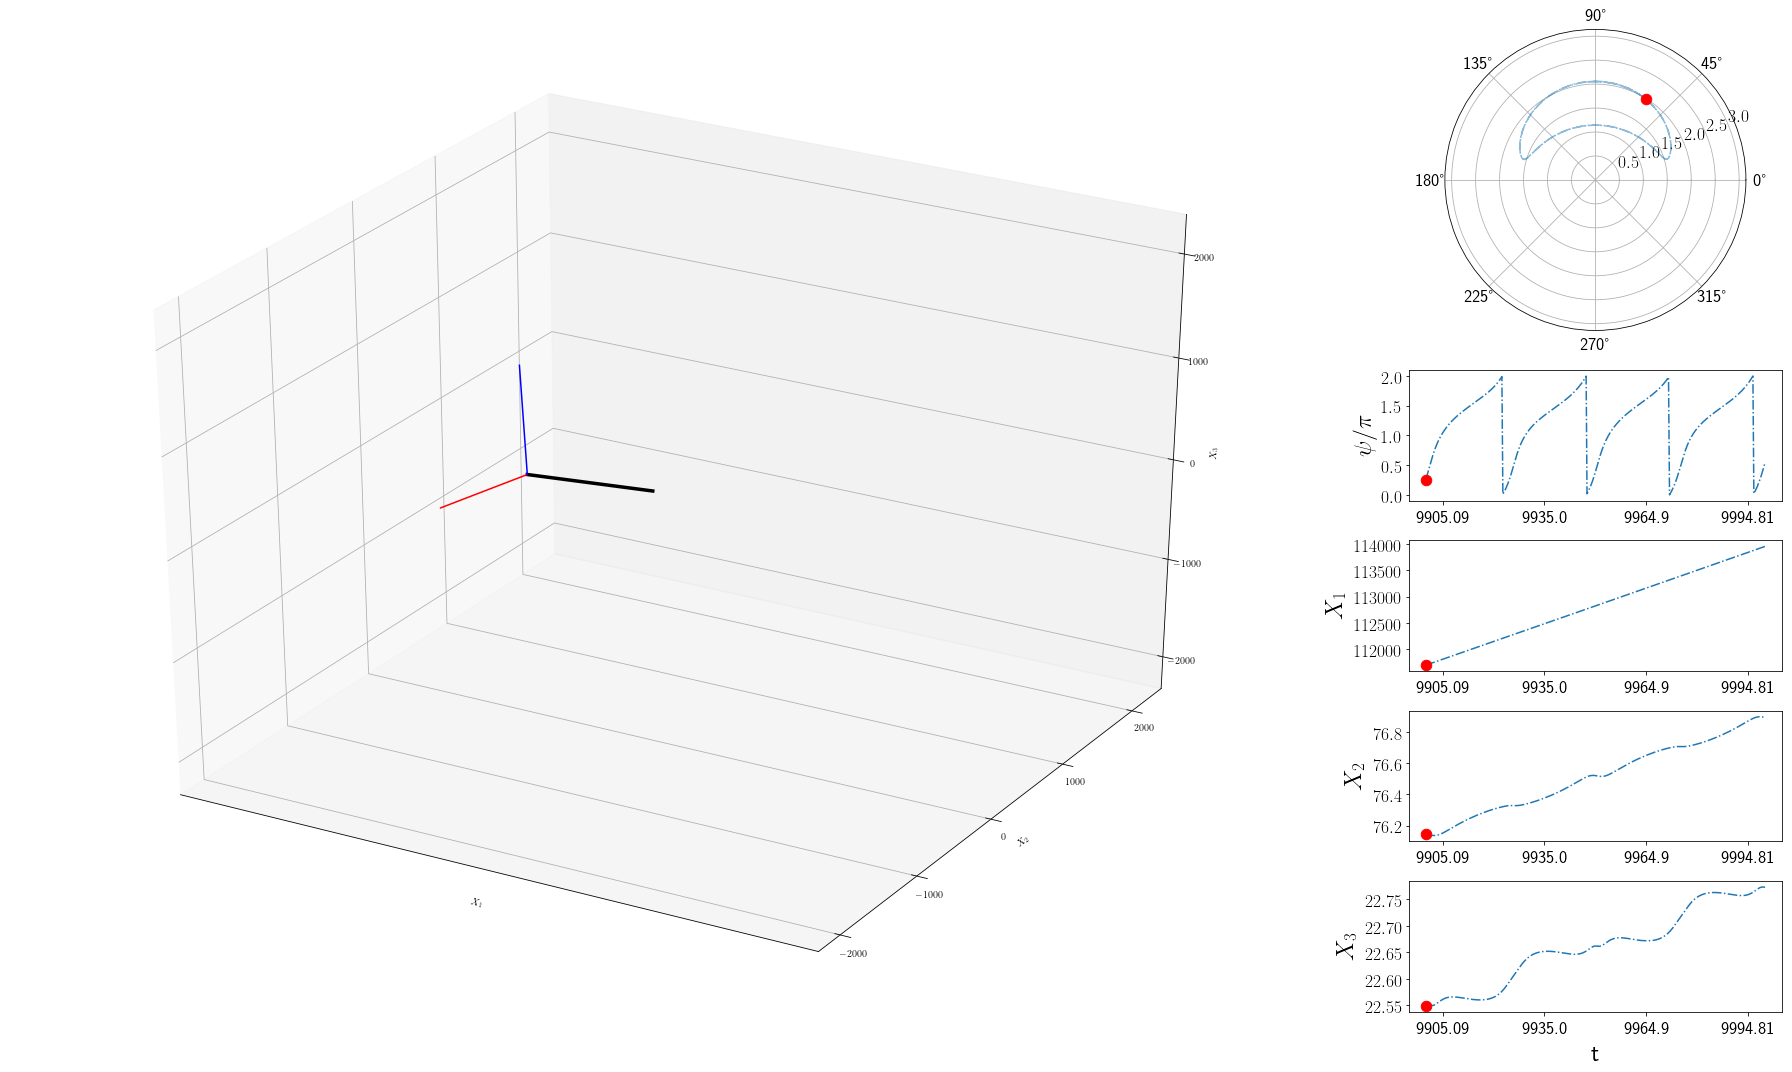

In [8]:
tpath = '/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/hlxB01_baseFlow_psi_rada/th1.297_ph2.439_ps4.941_D20200516_T220514.pickle'
with open(tpath, 'rb') as handle:
    tpick = pickle.load(handle)
Table_t = tpick['Table_t']
Table_dt = tpick['Table_dt']
Table_X = tpick['Table_X']
Table_P = tpick['Table_P']
Table_P2 = tpick['Table_P2']
Table_theta = tpick['Table_theta']
Table_phi = tpick['Table_phi']
Table_psi = tpick['Table_psi']
Table_eta = tpick['Table_eta']

tidx = Table_t > 9900
anim = spf_tb.make_table_video(Table_t[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx],
                               Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx],
                               zm_fct=1000, stp=1, interval=20, trange=None, resampling_fct=5)
anim
# tname = '%s_th%5.3f_ph%5.3f_ps%5.3f.mp4' % (table_name, t_theta, t_phi, t_psi)
# anim.save(tname, writer='ffmpeg', fps=15)
# print(tname, datetime.now())

trange_geo= 2.128276815730018
trange_trj= 221.50305859367654


/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


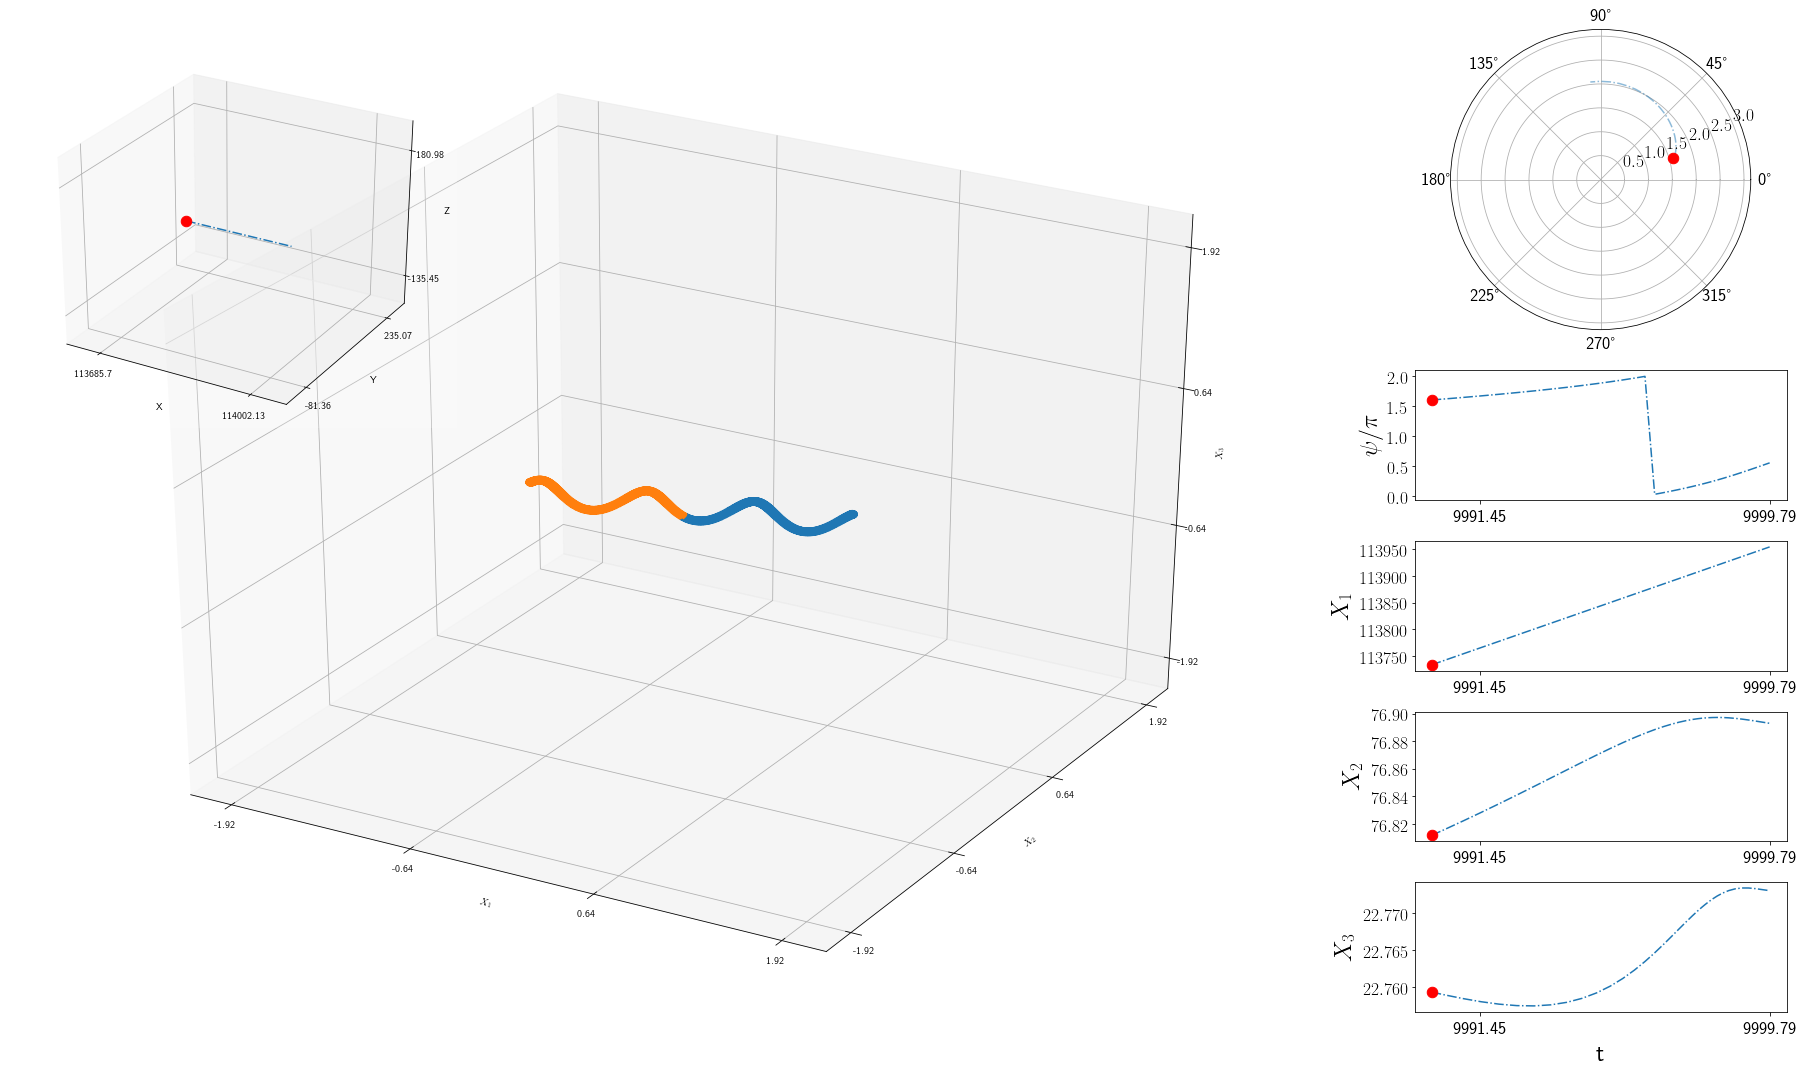

In [4]:
from src.objComposite import *

tpath = '/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/hlxB01_baseFlow_psi_rada/th1.297_ph2.439_ps4.941_D20200516_T220514.pickle'
problem_kwargs = {'nth': 20, 
                  'hfct': 1, 
                  'eh': -1, 
                  'ch': 3, 
                  'rh11': 0.1, 
                  'rh12': 0.1, 
                  'rh2': 0.03, 
                  'ph': 0.666667, 
                  'n_tail': 1, 
                  'with_cover': 2, 
                  'with_T_geo': 0, 
                  'left_hand': 0, 
                  'rT2': 0.1, 
                  'center': np.zeros(3), 
                  'matrix_method': 'pf', 
                  'zoom_factor': 1, } 

with open(tpath, 'rb') as handle:
    tpick = pickle.load(handle)
Table_t = tpick['Table_t']
Table_dt = tpick['Table_dt']
Table_X = tpick['Table_X']
Table_P = tpick['Table_P']
Table_P2 = tpick['Table_P2']
Table_theta = tpick['Table_theta']
Table_phi = tpick['Table_phi']
Table_psi = tpick['Table_psi']
Table_eta = tpick['Table_eta']

tidx = Table_t > 9900
anim = spf_tb.make_table_video_geo(Table_t[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx],
                                   Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx],
                                   zm_fct=1, stp=1, interval=20, trange_geo=None, trange_trj=None, 
                                   create_obj_at_fun=get_tail_nodes_split_at, resampling_fct=5, 
                                   **problem_kwargs)
anim
# tname = '%s_th%5.3f_ph%5.3f_ps%5.3f.mp4' % (table_name, t_theta, t_phi, t_psi)
# anim.save(tname, writer='ffmpeg', fps=15)
# print(tname, datetime.now())

/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/hlxC01_baseFlow_psi_rada/th1.628_ph3.698_ps5.755_D20200516_T231701.pickle
trange_geo= 2.1822130588614286
trange_trj= 1.0336849939568964


/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes

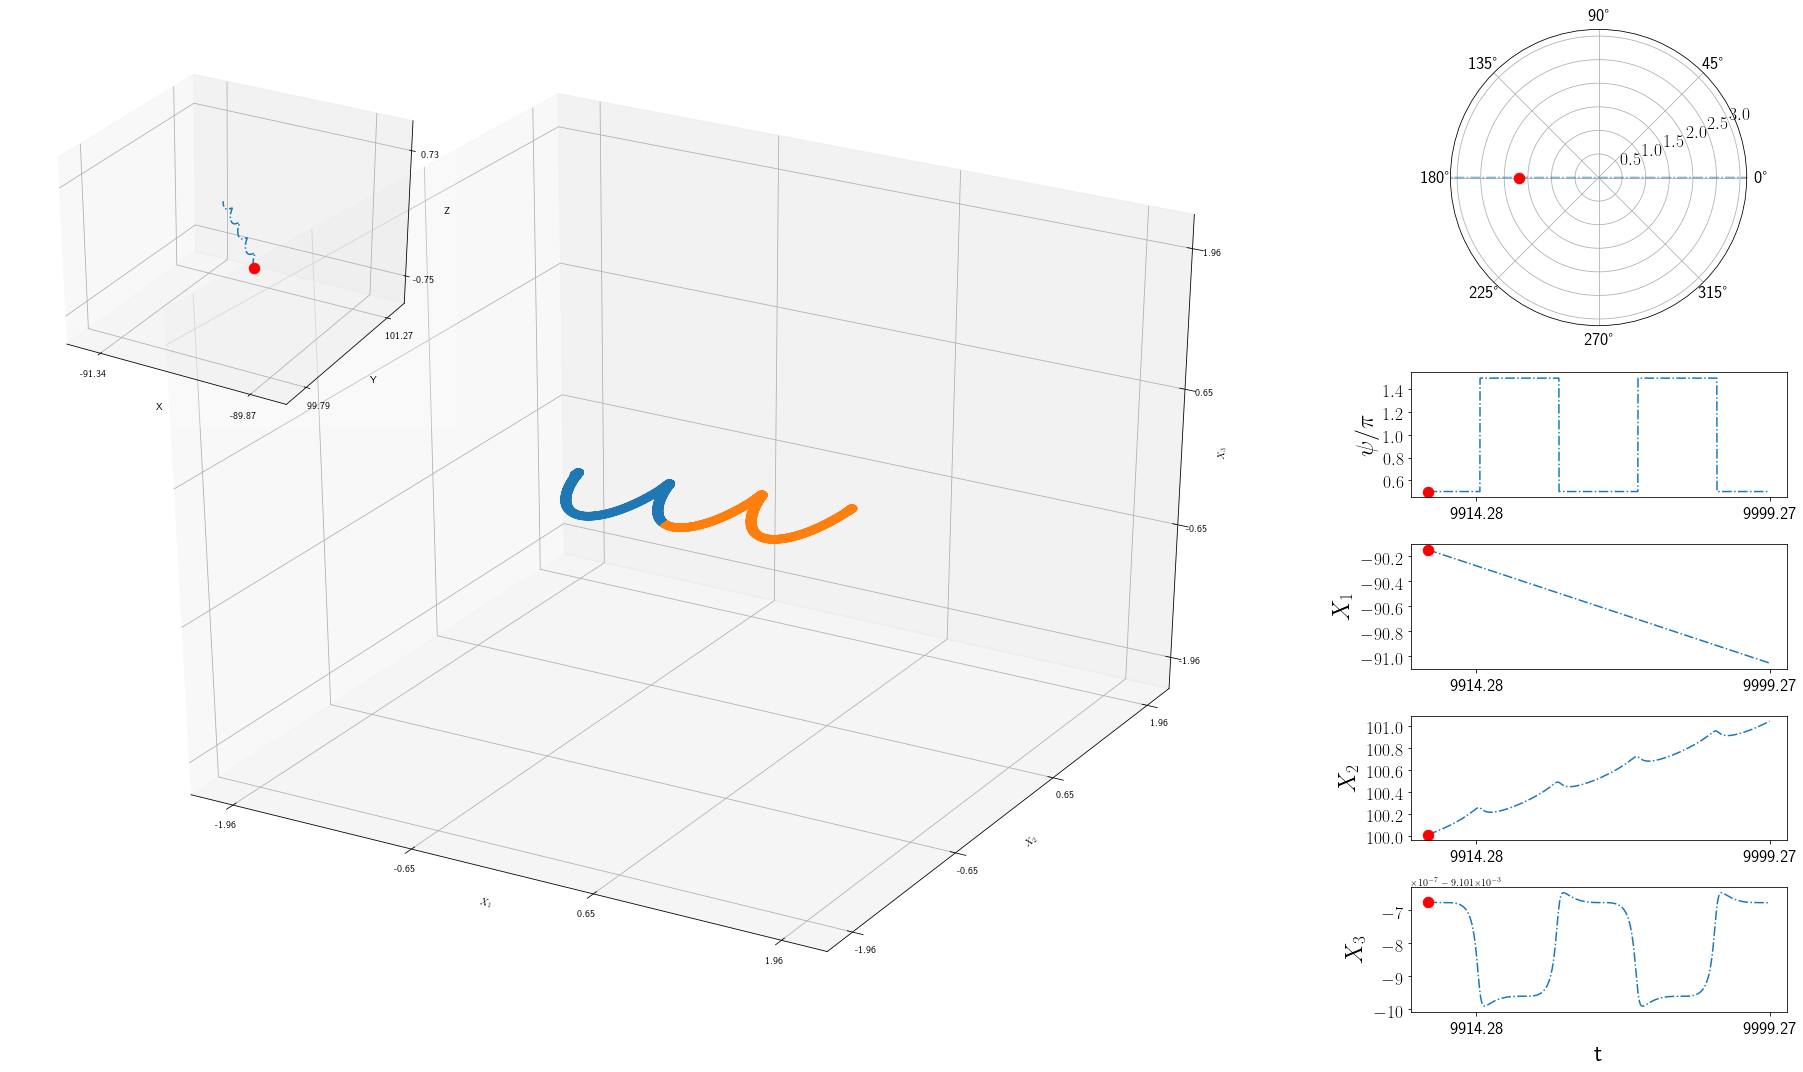

In [6]:
tpath = '/home/zhangji/stokes_flow_master/head_Force/do_calculate_table/hlxC01_baseFlow_psi_rada/th1.628_ph3.698_ps5.755_D20200516_T231701.pickle'

print(tpath)
with open(tpath, 'rb') as handle:
    tpick = pickle.load(handle)
Table_t = tpick['Table_t']
Table_dt = tpick['Table_dt']
Table_X = tpick['Table_X']
Table_P = tpick['Table_P']
Table_P2 = tpick['Table_P2']
Table_theta = tpick['Table_theta']
Table_phi = tpick['Table_phi']
Table_psi = tpick['Table_psi']
Table_eta = tpick['Table_eta']
table_dir = os.path.join('/home/zhangji/stokes_flow_master/src', 
                         '%s.pickle' % tpick['problem_kwargs']['table_name'])
with open(table_dir, 'rb') as handle:
    table_pick = pickle.load(handle)
problem_kwargs = table_pick['problem_kwargs']

tidx = Table_t > 9900
anim = spf_tb.make_table_video_geo(Table_t[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx],
                                   Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx],
                                   zm_fct=1, stp=1, interval=20, trange_geo=None, trange_trj=None, 
                                   create_obj_at_fun=get_tail_nodes_split_at, resampling_fct=5, 
                                   **problem_kwargs)
anim

In [ ]:
# active ecoli petsc family method 
t0 = time()
t_theta, t_phi, t_psi = 0, 0, 0
max_t = 100
update_fun='1fe'
rtol=1e-6
atol=1e-9
eval_dt = 0.001
save_every = np.ceil(1 / eval_dt / 100)

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ecoli_Petsc(tnorm, t_psi, max_t, update_fun=update_fun, 
                                     rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                     save_every=save_every)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_RK4n', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every=save_every)

t_pick = (t_theta, t_phi, t_psi, max_t, update_fun, rtol, atol, eval_dt, 
          Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, save_every=save_every)
idx = np.load('../motion_ecoliB01_table/idx.npy')
t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
np.save('../motion_ecoliB01_table/idx.npy', (idx + 1))
with open('../motion_ecoliB01_table/%s' % t_name, 'wb') as handle:    
    pickle.dump(t_pick, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('save to %s' % t_name)

In [ ]:
t_theta, t_phi, t_psi = 0, 0, 0
t_name = 'theta%5.3f_phi%5.3f_psi%5.3f.pickle' % (t_theta, t_phi, t_psi)
with open('../motion_ecoliB01_table/%s' % t_name, 'rb') as handle:    
    tpick = pickle.load(handle)
max_t, t_theta, t_phi, t_psi, tnorm, Table_t, Table_X, Table_P, Table_P2, \
         Table_theta, Table_phi, Table_psi, Table_eta = tpick
print('load table_data from %s' % t_name)

t0 = 0
t1 = t0 + 100
idx = (t0 < Table_t) & (Table_t <  t1)
show_table_result(Table_t[idx], Table_theta[idx], Table_phi[idx], Table_psi[idx], 
                  Table_eta[idx], Table_X[idx])


In [ ]:
fig = plt.figure(figsize=(20, 8))
fig.patch.set_facecolor('white')
axs = fig.subplots(nrows=1, ncols=2)
ax0 = axs[0]
ax0.plot(np.diff(Table_t))
ax1 = axs[1]
ax1.hist(np.diff(Table_t), bins=30, log=True)
# ax1.y
pass


/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:12: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')



last norm:  1.1152003723385397 , 3.0335884980598116 , 6.211068334650362
do_calculate_helix_Petsc4n: run 388 loops/times using 51.637057s
PETSC RK_3bs rt1e-06, at1e-09, dt1e-03 51.6s


True

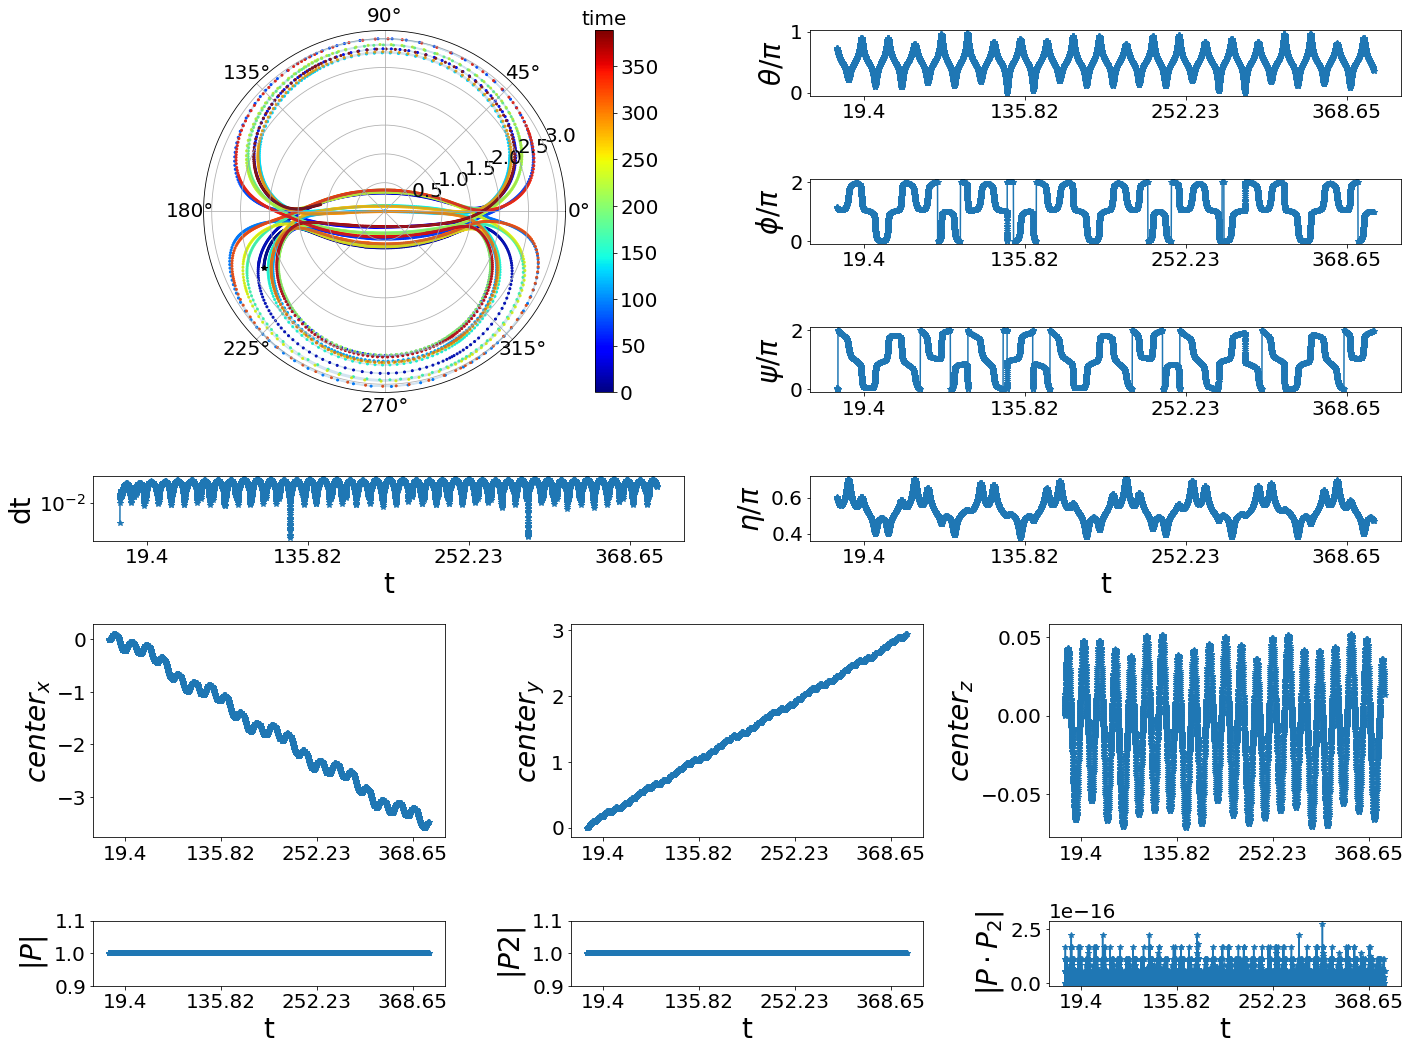

In [8]:
# passive helix petsc family method. 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = 2.3152741272218287, 3.5814852379695763, 0.18965274298144974
max_t = 20000 - 19611.95812970513
update_fun='3bs'
rtol=1e-6
atol=1e-9
eval_dt = 1e-3
save_every = 1
table_name='hlxC01_tau1a'
omega_tail=0

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_helix_Petsc4n(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, 
                                       eval_dt=eval_dt, save_every=save_every, 
                                       table_name=table_name, omega_tail=omega_tail)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_helix_Petsc4n', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every=save_every)

/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:12: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')


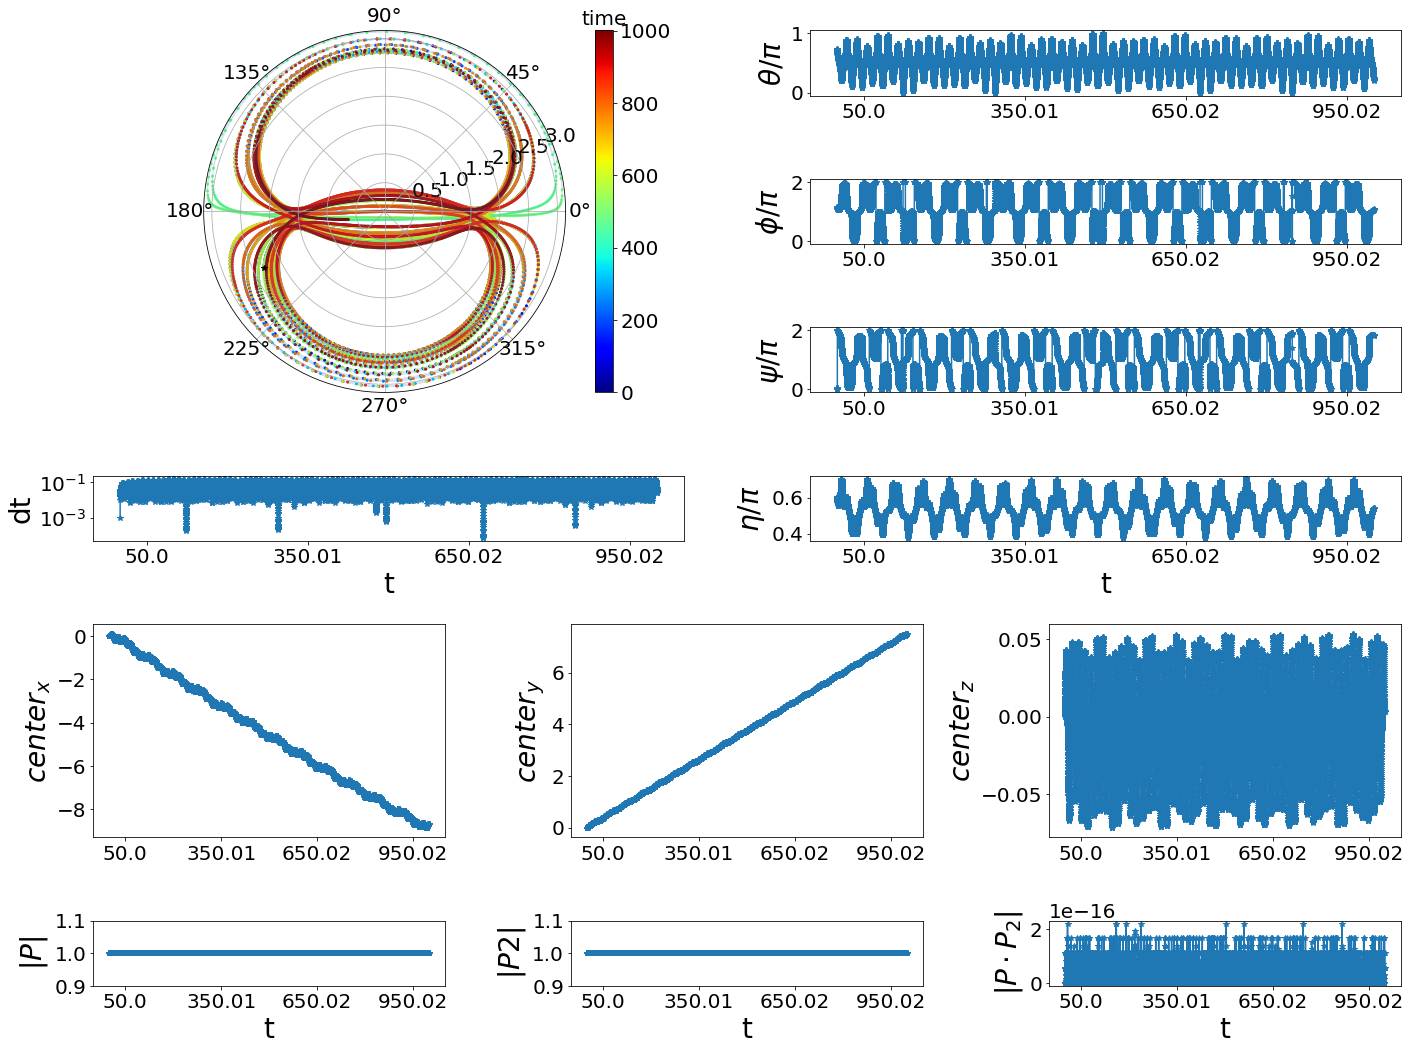

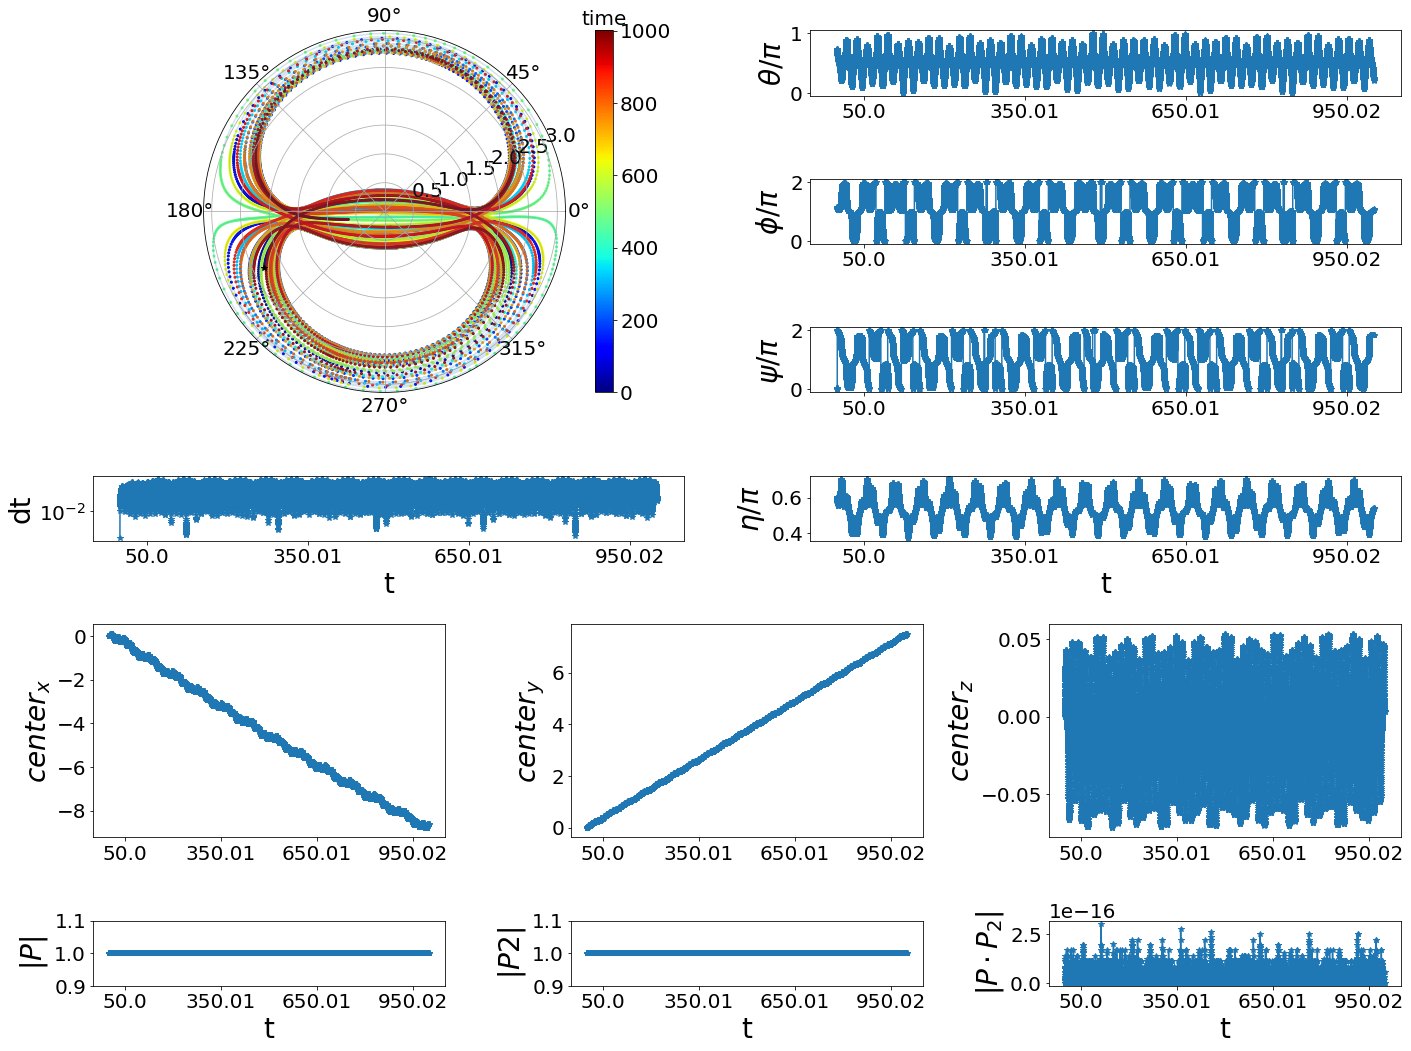

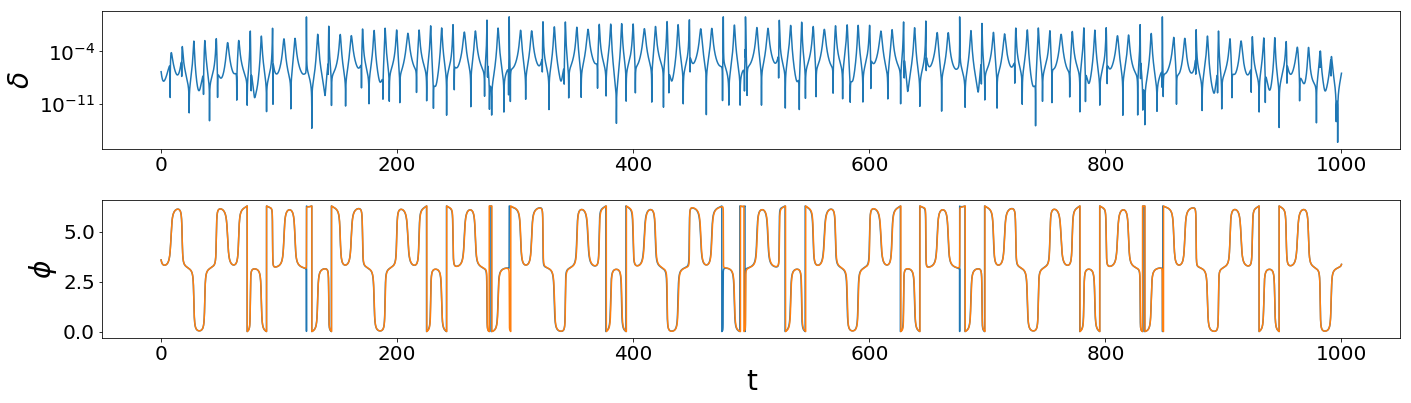

In [34]:
# passive helix petsc family method, check if is chaotic
importlib.reload(spf_tb)
t0 = time()
max_t = 1000
update_fun='3bs'
rtol=1e-6
atol=1e-9
eval_dt = 1e-3
save_every = 1
table_name='hlxC01_tau1a'
omega_tail=0
t_theta1, t_phi1, t_psi1 = 2.3152741272218287, 3.5814852379695763, 0.18965274298144974
t_theta2, t_phi2, t_psi2 = t_theta1, t_phi1 + 0.001, t_psi1

# result: Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta
tnorm1 = np.array((np.sin(t_theta1) * np.cos(t_phi1), np.sin(t_theta1) * np.sin(t_phi1), np.cos(t_theta1)))
result1 = spf_tb.do_calculate_helix_Petsc4n(tnorm1, t_psi1, max_t, 
                                            update_fun=update_fun, rtol=rtol, atol=atol, 
                                            eval_dt=eval_dt, save_every=save_every, 
                                            table_name=table_name, omega_tail=omega_tail)
spf_tb.show_table_result(*result1, save_every=save_every)
tnorm2 = np.array((np.sin(t_theta2) * np.cos(t_phi2), np.sin(t_theta2) * np.sin(t_phi2), np.cos(t_theta2)))
result2 = spf_tb.do_calculate_helix_Petsc4n(tnorm2, t_psi2, max_t, 
                                            update_fun=update_fun, rtol=rtol, atol=atol, 
                                            eval_dt=eval_dt, save_every=save_every, 
                                            table_name=table_name, omega_tail=omega_tail)
spf_tb.show_table_result(*result2, save_every=save_every)

# result: Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta
Table_t1 = result1[0]
Table_t2 = result2[0]
Table_phi1 = result1[6]
Table_phi2 = result2[6]
t1 = np.max((Table_t1.min(), Table_t2.min()))
t2 = np.min((Table_t1.max(), Table_t2.max()))
t_use = np.linspace(t1, t2, Table_t1.size + Table_t2.size)
phi1 = spf_tb.get_continue_angle(Table_t1, Table_phi1, t_use=t_use)
phi2 = spf_tb.get_continue_angle(Table_t2, Table_phi2, t_use=t_use)
delta_cos2psi = (np.cos(phi1) - np.cos(phi2)) ** 2

fig = plt.figure(figsize=(20, 6))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)
ax0.semilogy(t_use, delta_cos2psi)
plt.sca(ax0)
# ax0.set_xlabel('t', size=fontsize * 0.7)
ax0.set_ylabel('$\delta$', size=fontsize * 0.7)
# ax0.set_ylabel('$(\cos(\phi1) - \cos(\phi2))^2$', size=fontsize * 0.7)
plt.xticks(fontsize=fontsize * 0.5)
plt.yticks(fontsize=fontsize * 0.5)

ax1.plot(t_use, phi1)
ax1.plot(t_use, phi2)
plt.sca(ax1)
ax1.set_xlabel('t', size=fontsize * 0.7)
ax1.set_ylabel('$\phi$', size=fontsize * 0.7)
plt.xticks(fontsize=fontsize * 0.5)
plt.yticks(fontsize=fontsize * 0.5)
plt.tight_layout()

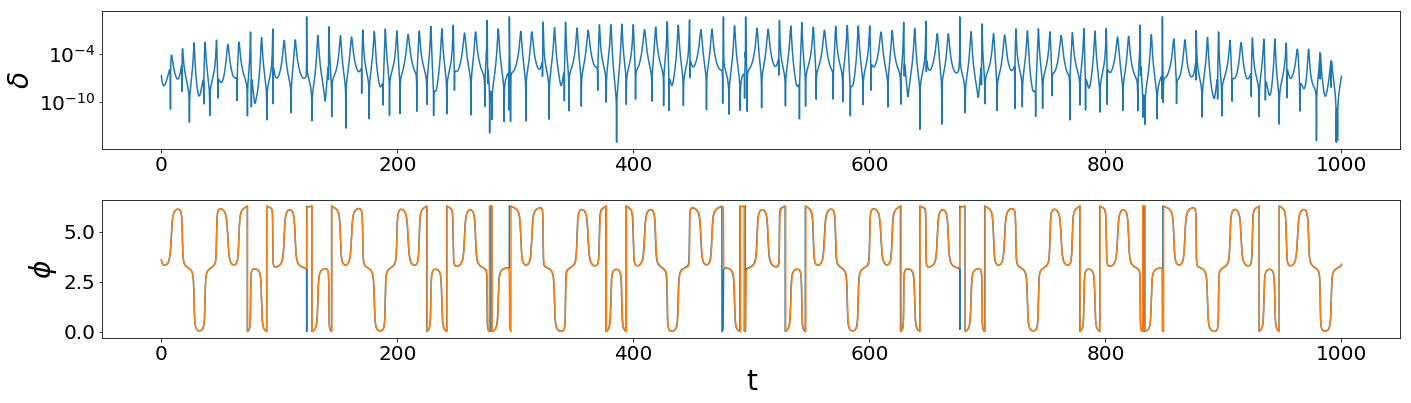

In [33]:
# result: Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta
Table_t1 = result1[0]
Table_t2 = result2[0]
Table_phi1 = result1[6]
Table_phi2 = result2[6]
t1 = np.max((Table_t1.min(), Table_t2.min()))
t2 = np.min((Table_t1.max(), Table_t2.max()))
t_use = np.linspace(t1, t2, Table_t1.size + Table_t2.size)
phi1 = spf_tb.get_continue_angle(Table_t1, Table_phi1, t_use=t_use)
phi2 = spf_tb.get_continue_angle(Table_t2, Table_phi2, t_use=t_use)
delta_cos2psi = (np.cos(phi1) - np.cos(phi2)) ** 2

fig = plt.figure(figsize=(20, 6))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)
ax0.semilogy(t_use, delta_cos2psi)
plt.sca(ax0)
# ax0.set_xlabel('t', size=fontsize * 0.7)
ax0.set_ylabel('$\delta$', size=fontsize * 0.7)
# ax0.set_ylabel('$(\cos(\phi1) - \cos(\phi2))^2$', size=fontsize * 0.7)
plt.xticks(fontsize=fontsize * 0.5)
plt.yticks(fontsize=fontsize * 0.5)

ax1.plot(t_use, phi1)
ax1.plot(t_use, phi2)
plt.sca(ax1)
ax1.set_xlabel('t', size=fontsize * 0.7)
ax1.set_ylabel('$\phi$', size=fontsize * 0.7)
plt.xticks(fontsize=fontsize * 0.5)
plt.yticks(fontsize=fontsize * 0.5)
plt.tight_layout()


last norm:  1.6113143651285207 , 4.642990535767577 , 4.814659155855136
do_calculate_ecoli_Petsc4nPsi: run 10000 loops/times using 365.750164s
PETSC RK_5bs rt1e-06, at1e-09, dt1e-03 365.8s


True

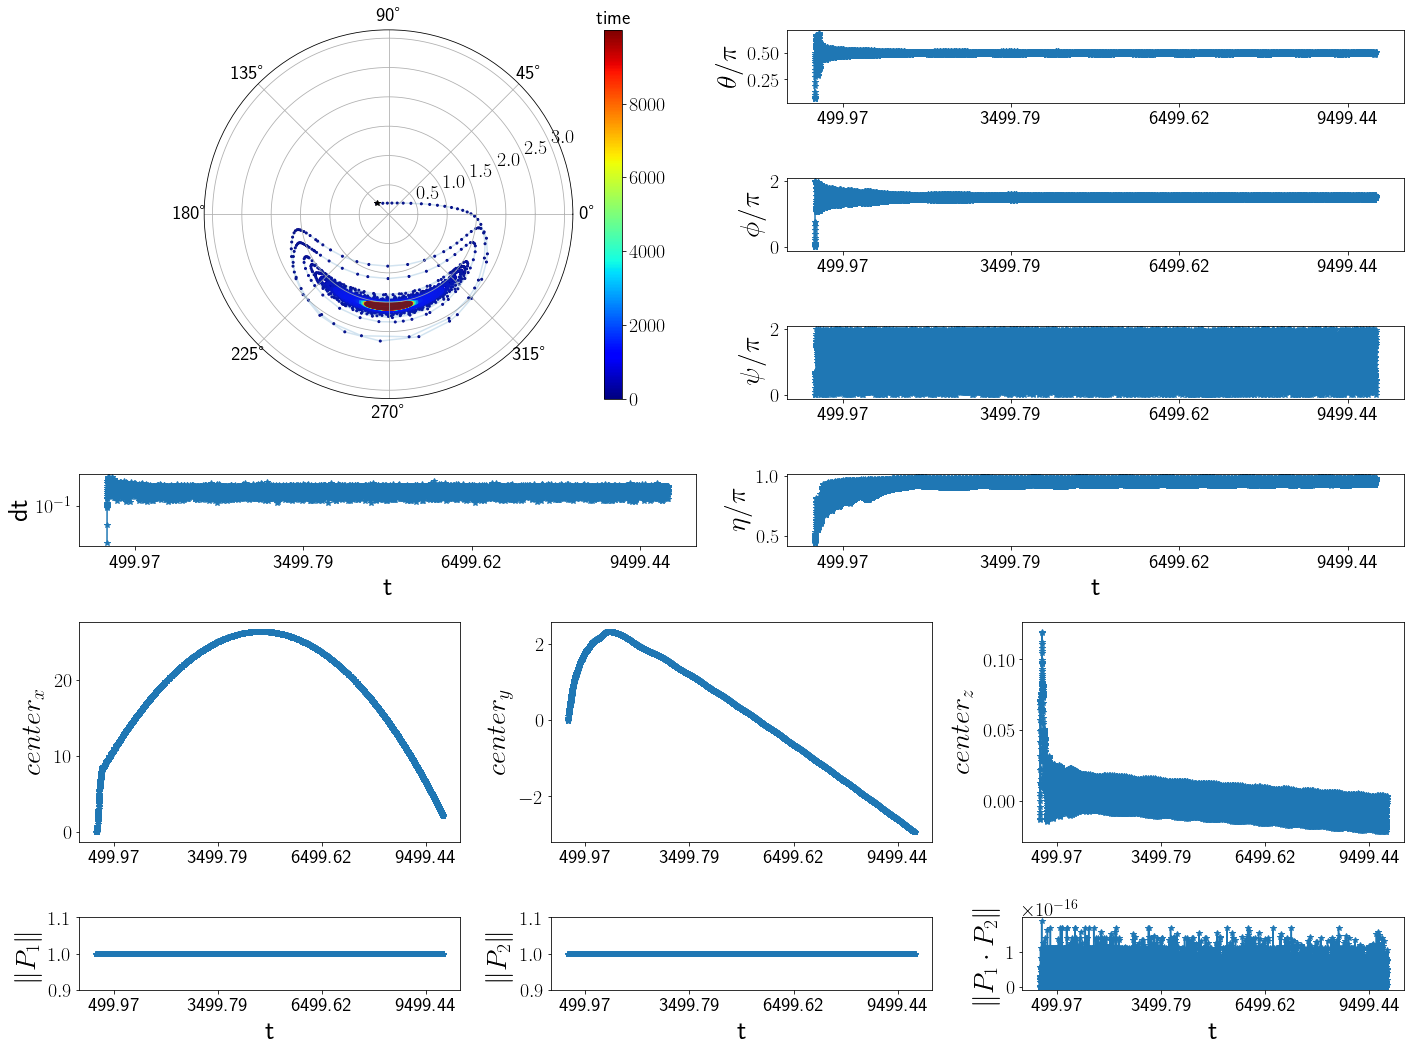

In [6]:
# active ecoli petsc family method 
importlib.reload(spf_tb)
importlib.reload(jm)

t0 = time()
t_theta, t_phi, t_psi = 0.273182, 2.406326, 0
max_t = 10000
update_fun='5bs'
rtol=1e-6
atol=1e-9
eval_dt = 0.001
save_every = 1
table_name='ecoC01B05_T0.01'
omega_tail=0.01

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
t_psi = np.ones(1) * t_psi
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta\
   = spf_tb.do_calculate_ecoli_Petsc4n(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, 
                                          eval_dt=eval_dt, save_every=save_every, 
                                          table_name=table_name, omega_tail=omega_tail)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc4nPsi', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every=save_every)

# t_pick = (t_theta, t_phi, t_psi, max_t, update_fun, rtol, atol, eval_dt, 
#           Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, save_every=save_every)
# idx = np.load('../motion_ecoliB01_t able/idx.npy')
# t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
# np.save('../motion_ecoliB01_table/idx.npy', (idx + 1))
# with open('../motion_ecoliB01_table/%s' % t_name, 'wb') as handle:    
#     pickle.dump(t_pick, handle, protocol=pickle.HIGHEST_PROTOCOL)
# print('save to %s' % t_name)

In [36]:
np.pi * 0.5

1.5707963267948966

/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:12: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')


True

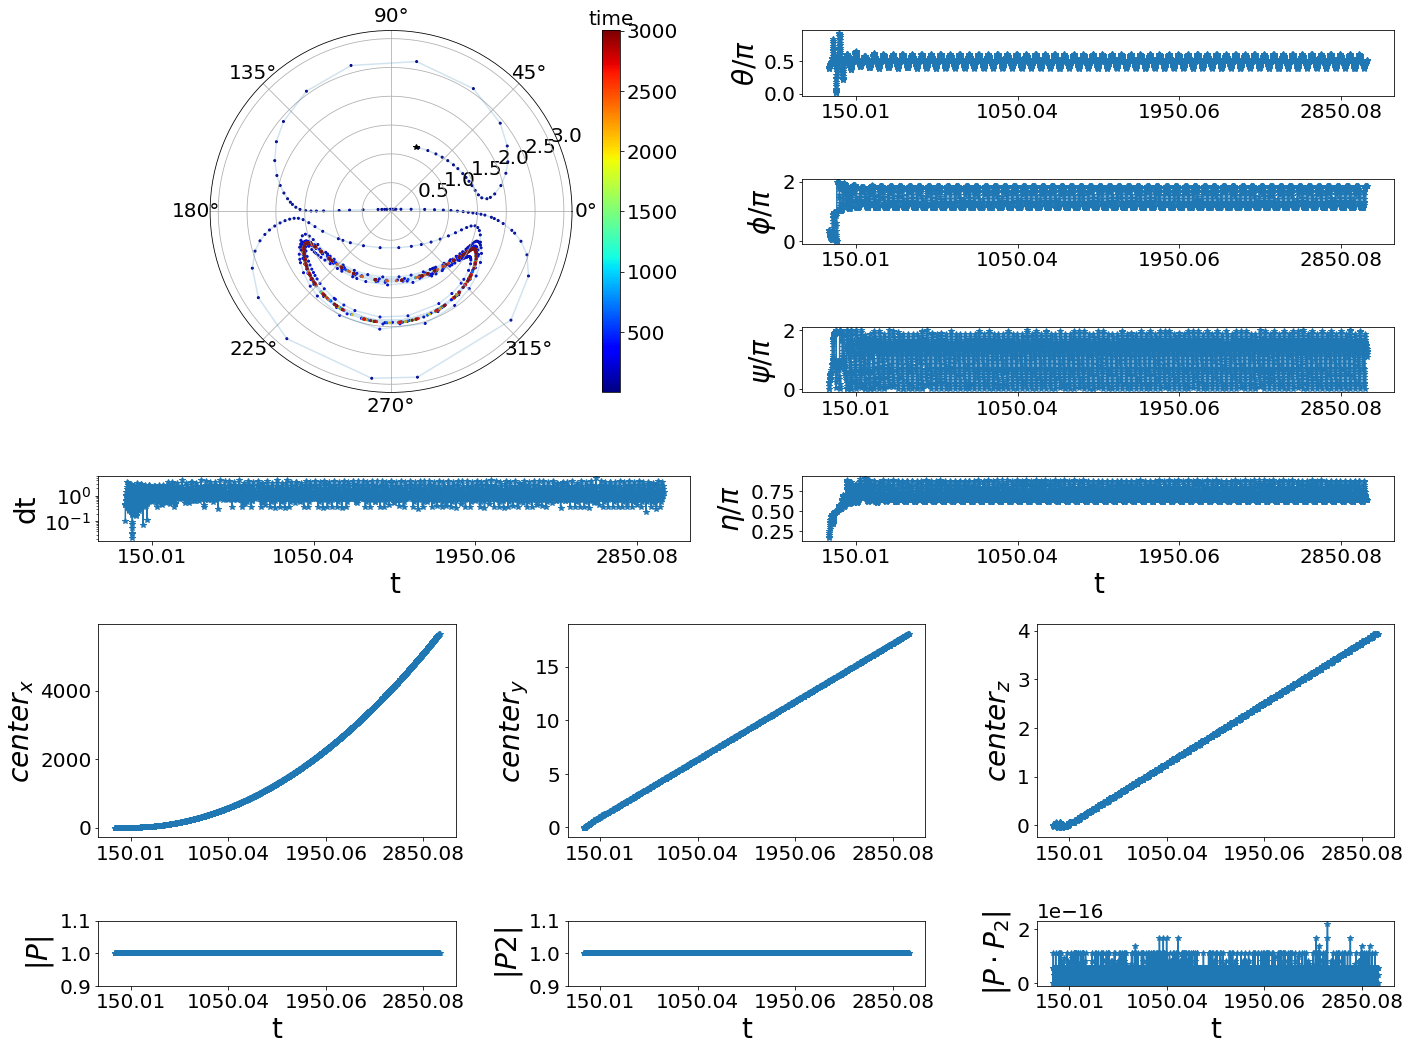

In [3]:
importlib.reload(spf_tb)

idx = np.logical_and((0 < Table_t), (Table_t < 6500))
spf_tb.show_table_result(Table_t[idx], Table_dt[idx], Table_X[idx], Table_P[idx], Table_P2[idx], 
                         Table_theta[idx], Table_phi[idx], Table_psi[idx], Table_eta[idx], save_every=save_every)

In [ ]:
# delta(t) =  [cos(phi_1(t))-cos(phi_2(t))]^2
